In [17]:
### Benjamin Tollison ###
import sympy as sp
from IPython.display import display, Math, Latex
from sympy.solvers.solveset import linsolve
from sympy.solvers.pde import pdsolve
from sympy import  lambdify, Matrix,sin,cos, sinh, cosh, exp, pi, symbols, integrate, Function, Eq
import numpy as np
import matplotlib.pyplot as plt
import scipy
def displayEquations(LHS,RHS):
    left = sp.latex(LHS)
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
    np.set_printoptions(suppress=True)

Text(0.5, 1.0, 'Comparing Numerical orbit to Exact')

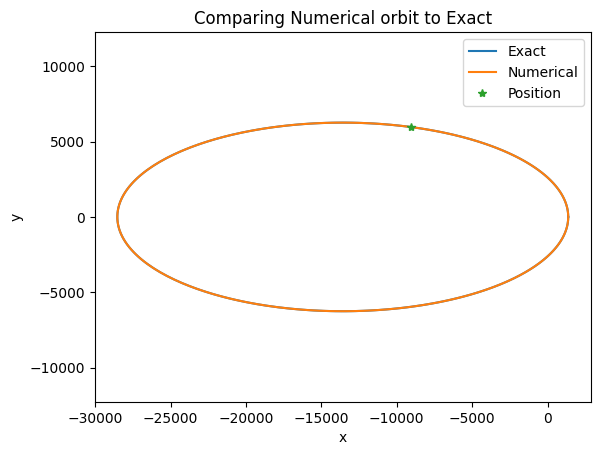

In [18]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

def Orbit_ODE(time:float(),x_vector,gravitational_parameter:float(),dummy_variable):
  dot_r = x_vector[3:6]
  dot_v = (-gravitational_parameter/(np.linalg.norm(x_vector[0:3]))**3) * x_vector[0:3]
  dot_x = np.hstack((dot_r,dot_v))
  return dot_x

# Problem 1a
r = np.array([-6755.6,6411.11,-5585.66])
v = np.array([-3.74170,5.63902,-0.972395])
earth_gravitational_parameter = 3.986004354360959*10**5
r_magnitude = np.linalg.norm(r)
v_magnitude = np.linalg.norm(v)
h = np.cross(r,v)
h_hat = h / np.linalg.norm(h)
e = np.cross(v,h)/earth_gravitational_parameter - r/r_magnitude
e_magnitude = np.linalg.norm(e)
e_hat = e/e_magnitude
specific_mechanical_energy = v_magnitude**2/2 - earth_gravitational_parameter/r_magnitude
e_magnitude = np.linalg.norm(e)
a = -earth_gravitational_parameter/(2*specific_mechanical_energy)
p = a*(1-e_magnitude**2)
p_hat = np.cross(h,e) / np.linalg.norm(np.cross(h,e))
orbit_period = ((2*np.pi)/np.sqrt(earth_gravitational_parameter))*a**(3/2)
true_anomoly = np.linspace(0,2*np.pi,1000)
r_conic = lambda nu: p / (1+e_magnitude*np.cos(nu))
x_exact = lambda nu: (np.cos(nu)) * r_conic(nu)
y_exact = lambda nu: (np.sin(nu) * r_conic(nu))

combined_vector = np.zeros(6)
for i in range(3):
  combined_vector[i], combined_vector[i+3] = r[i], v[i]
numerical_solution = scipy.integrate.solve_ivp(Orbit_ODE,(0,orbit_period),combined_vector,method='RK45',args=(earth_gravitational_parameter,2),rtol=1e-12,atol=1e-12)
x,y,z = numerical_solution.y[0],numerical_solution.y[1],numerical_solution.y[2]
r_numerical = np.zeros((len(x),3))
x_perifocal = np.zeros(len(x))
y_perifocal = np.zeros(len(x))
z_perifocal = np.zeros(len(x))
for i in range(len(x)):
  r_numerical[i] = np.array([x[i],y[i],z[i]])
  x_perifocal[i] = np.dot(r_numerical[i],e_hat)
  y_perifocal[i] = np.dot(r_numerical[i],p_hat)
  z_perifocal[i] = np.dot(r_numerical[i],h_hat)
for i in z_perifocal:
  if i >= 1e-10:
    print("error: vec(r) dot h_hat != 0")
plt.plot(x_exact(true_anomoly),y_exact(true_anomoly),label='Exact')
plt.plot(x_perifocal,y_perifocal,label='Numerical')
plt.plot(np.dot(r,e_hat),np.dot(r,p_hat),'*',label='Position')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.title('Comparing Numerical orbit to Exact')

In [19]:
h_symbol,e_symbol,specific_mechanical_energy_symbol, a_symbol = symbols('\\vec{h} \\vec{e} \\xi a')
displayEquations(h_symbol,h)
displayEquations(e_symbol,e)
displayEquations('e',e_magnitude)
displayEquations(a_symbol,a)
displayEquations('p',p)
displayEquations(specific_mechanical_energy_symbol,specific_mechanical_energy)
displayEquations('TP',orbit_period)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Text(0.5, 1.0, 'Comparing Numerical orbit to Exact')

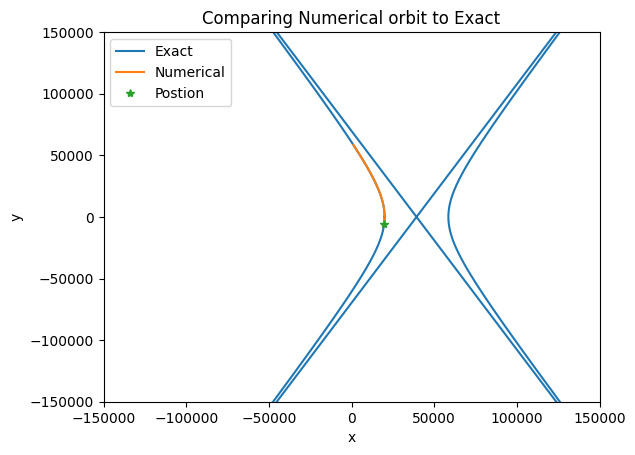

In [20]:
# Problem 1b
r = np.array([-10618.9,5106.13,-16902.2])
v = np.array([-4.03295,-6.04142,2.56842])
earth_gravitational_parameter = 3.986004354360959*10**5
r_magnitude = np.linalg.norm(r)
v_magnitude = np.linalg.norm(v)
h = np.cross(r,v)
h_hat = h / np.linalg.norm(h)
e = np.cross(v,h)/earth_gravitational_parameter - r/r_magnitude
e_magnitude = np.linalg.norm(e)
e_hat = e/e_magnitude
specific_mechanical_energy = v_magnitude**2/2 - earth_gravitational_parameter/r_magnitude
e_magnitude = np.linalg.norm(e)
a = -earth_gravitational_parameter/(2*specific_mechanical_energy)
p = a*(1-e_magnitude**2)
p_hat = np.cross(h,e) / np.linalg.norm(np.cross(h,e))
true_anomoly = np.linspace(0,2*np.pi,1000)
r_conic = lambda nu: p / (1+e_magnitude*np.cos(nu))
x_exact = lambda nu: (np.cos(nu)) * r_conic(nu)
y_exact = lambda nu: (np.sin(nu) * r_conic(nu))
combined_vector = np.zeros(6)
for i in range(3):
  combined_vector[i], combined_vector[i+3] = r[i], v[i]
numerical_solution = scipy.integrate.solve_ivp(Orbit_ODE,(-5000,5000),combined_vector,method='RK45',args=(earth_gravitational_parameter,2),rtol=1e-12,atol=1e-12)
x,y,z = numerical_solution.y[0],numerical_solution.y[1],numerical_solution.y[2]
r_numerical = np.zeros((len(x),3))
x_perifocal = np.zeros(len(x))
y_perifocal = np.zeros(len(x))
z_perifocal = np.zeros(len(x))
for i in range(len(x)):
  r_numerical[i] = np.array([x[i],y[i],z[i]])
  x_perifocal[i] = np.dot(r_numerical[i],e_hat)
  y_perifocal[i] = np.dot(r_numerical[i],p_hat)
  z_perifocal[i] = np.dot(r_numerical[i],h_hat)
for i in z_perifocal:
  if i >= 1e-10:
    print("error: vec(r) dot h_hat != 0")
plt.plot(x_exact(true_anomoly),y_exact(true_anomoly),label='Exact')
plt.plot(x_perifocal,y_perifocal,label='Numerical')
plt.plot(np.dot(r,e_hat),np.dot(r,p_hat),'*',label='Postion')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1.5e5,1.5e5)
plt.xlim(-1.5e5,1.5e5)
plt.title('Comparing Numerical orbit to Exact')

In [21]:

h_symbol,e_symbol,specific_mechanical_energy_symbol, a_symbol = symbols('\\vec{h} \\vec{e} \\xi a')
displayEquations(h_symbol,h)
displayEquations(e_symbol,e)
displayEquations('e',e_magnitude)
displayEquations(a_symbol,a)
displayEquations('p',p)
displayEquations(specific_mechanical_energy_symbol,specific_mechanical_energy)
displayEquations('TP','undefined')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

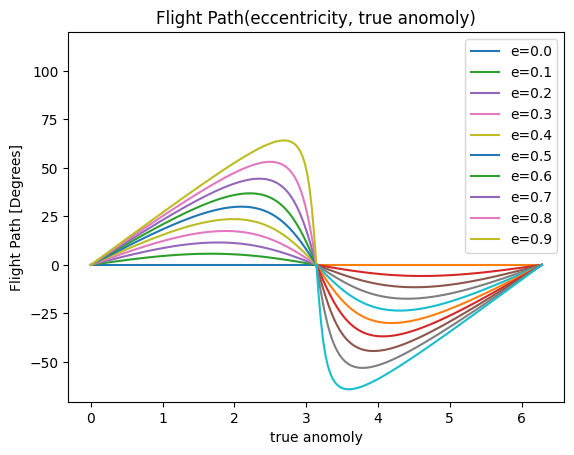

In [22]:
# Problem 2
gamma = lambda e,f: np.degrees(np.arccos((1+e*np.cos(f)) / ((1+2*e*np.cos(f)+e**2)**.5)))
e_values = np.arange(start=0,stop=1,step=0.1)
f_values_positive = np.linspace(0,np.pi,100)
f_values_negative = np.linspace(np.pi,2*np.pi,100)
for i in e_values:
  plt.plot(f_values_positive,gamma(i,f_values_positive), label="e={}".format(round(i,2)))
  plt.plot(f_values_negative,-gamma(i,f_values_negative))
plt.title('Flight Path(eccentricity, true anomoly)')
plt.legend()
plt.ylabel('Flight Path [Degrees]')
plt.xlabel('true anomoly')
plt.ylim(top=120)
plt.show()